In [317]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm
from sklearn.metrics import f1_score

import spacy

import string

import re

import nltk

import pandas as pd

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

from wordcloud import WordCloud

import matplotlib.pyplot as plt

from textblob import TextBlob

In [201]:
a_19 = open("anderson_19-01.txt", "r")
a_21 = open("anderson_21-01.txt", "r")

b_19 = open("burnett_19-01.txt", "r")
b_21 = open("burnett_21-01.txt", "r")

c_19 = open("cuomo_19-01.txt", "r")
c_21 = open("cuomo_21-01.txt", "r")

cnt1_19 = open("cnntonight1_19-01.txt", "r")
cnt2_19 = open("cnntonight2_19-01.txt", "r")
cnt1_21 = open("cnntonight1_21-01.txt", "r")
cnt2_21 = open("cnntonight2_21-01.txt", "r")

def text_to_list(text):
    list_name = [x for x in text]
    return list_name

all_text = [a_19, a_21, b_19, b_21, c_19, c_21, cnt1_19, cnt2_19, cnt1_21, cnt2_21]

all_text_list = [text_to_list(i) for i in all_text]
text_19_list = [j for i,j in enumerate(all_text_list) if i%2 == 0]
text_21_list = [j for i,j in enumerate(all_text_list) if i%2 == 1]

### Cleaning text files

In [204]:
#Taking the list and turning it into one big string
def combining(list_name):
    list_name = [i for i in list_name if i != '\n']
    combined_text = ' '.join(list_name)
    return combined_text

all_text_combined = [combining(i) for i in all_text_list]
text_19_combined = [combining(i) for i in text_19_list]
text_21_combined = [combining(i) for i in text_21_list]

punctuation = re.sub('[:-]', '', string.punctuation)

#Cleaning the text
def cleaning(combined_text):
    #removing all new lines
    combined_text = re.sub("\n ", ' ', combined_text)
    #removing all capital letters (continuous ones)
    combined_text = re.sub(r"([A-Z]{2,})", '', combined_text)
    #remove punctuations
    combined_text = re.sub('[%s]' % re.escape(punctuation), '', combined_text)
    #remove all time stamps which have the format of xx:xx:xx where x are numericals
    combined_text = re.sub(r'[0-9]{2}:[0-9]{2,}:[0-9]{2,}', '', combined_text)
    #remove all - and :
    combined_text = re.sub('[:-]', ' ', combined_text)
    #remove all excess spaces
    combined_text = re.sub('[ ]{2,}', ' ', combined_text)
    #make it all lower-case
    combined_text = combined_text.lower()
    #remove numerical values
    combined_text = re.sub(r'[0-9]+[ ]', '', combined_text)
    return combined_text

all_text_cleaned = [cleaning(i) for i in all_text_combined]
text_19_cleaned = [cleaning(i) for i in text_19_combined]
text_21_cleaned = [cleaning(i) for i in text_21_combined]

### Analysis

In [205]:
#one hot encoding - count vectorizer
def countvectorizer(text):
    cv = CountVectorizer(stop_words = 'english')
    text_cv = cv.fit_transform(text)
    text_df = pd.DataFrame(text_cv.toarray(), columns = cv.get_feature_names())
    return text_df

In [208]:
countvectorizer(text_19_cleaned)

,19th,25th,45th,46th,6th,80s,abet,abetted,ability,able,...,york,yorker,yorks,young,youre,youtube,youve,zeleny,zone,zones
0,0,0,0,1,0,2,0,0,0,5,...,2,0,0,1,4,0,0,0,1,0
1,0,1,1,3,5,0,0,0,1,1,...,3,0,0,0,4,0,0,3,0,1
2,2,0,0,0,5,0,0,0,0,5,...,1,1,0,3,9,0,5,0,0,0
3,0,0,0,1,2,0,0,0,3,3,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,1,1,2,5,...,0,0,1,0,3,1,6,0,0,0


In [160]:
#tfidf vectorizer
def tfidfvectorizer(text):
    tfidf = TfidfVectorizer(stop_words = 'english')
    text_tfidf = tfidf.fit_transform(all_text_cleaned)
    text_tfidf_df = pd.DataFrame(text_tfidf.toarray(), columns = tfidf.get_feature_names())
    return text_tfidf_df

In [187]:
tfidfvectorizer(all_text_cleaned)

,19th,20th,25th,45th,46th,6th,80s,abet,abetted,ability,...,youre,youth,youtube,youve,zealotry,zeleny,zero,zients,zone,zones
0,0.000000,0.000000,0.000000,0.000000,0.007538,0.000000,0.022801,0.000000,0.000000,0.000000,...,0.016860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009691,0.000000
1,0.000000,0.012775,0.000000,0.000000,0.000000,0.024910,0.000000,0.000000,0.000000,0.000000,...,0.028340,0.000000,0.000000,0.005671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.013291,0.013291,0.026365,0.032394,0.000000,0.000000,0.000000,0.006479,...,0.019656,0.000000,0.000000,0.000000,0.000000,0.039873,0.000000,0.000000,0.000000,0.013291
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.005827,0.000000,0.000000,0.000000,0.005827,...,0.026519,0.000000,0.000000,0.015920,0.011954,0.000000,0.000000,0.000000,0.010162,0.000000
4,0.029036,0.000000,0.000000,0.000000,0.000000,0.035385,0.000000,0.000000,0.000000,0.000000,...,0.048309,0.000000,0.000000,0.032224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.006383,0.000000,0.000000,0.000000,0.012765,...,0.125865,0.013094,0.011131,0.005812,0.000000,0.000000,0.013094,0.052374,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.008951,0.013197,0.000000,0.000000,0.000000,0.019796,...,0.005005,0.000000,0.000000,0.006009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.008951,0.013197,0.000000,0.000000,0.000000,0.019796,...,0.005005,0.000000,0.000000,0.006009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014469,0.014469,0.014106,...,0.016049,0.000000,0.012300,0.038539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006572,...,0.024922,0.000000,0.000000,0.017954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [279]:
stop_words = stopwords.words('english')

# Looking at the most common words
def frequency(text, stop_words_list):
    tokens = [word_tokenize(i) for i in text]
    filtered_tokens = [j for i in tokens for j in i if not j in stop_words_list]
    df = pd.DataFrame.from_dict(FreqDist(filtered_tokens), orient = 'index').reset_index().rename(columns = {0:'Counts', 'index':'Word'}).sort_values(by=['Counts'], ascending = False)
    return df


In [255]:
freq_all = frequency(all_text_cleaned, stop_words)
freq_19 = frequency(text_19_cleaned, stop_words)
freq_21 = frequency(text_21_cleaned, stop_words)

In [294]:
print('Total Number of Words: ' + str(freq_all['Counts'].sum()))
print('Total Number of Words on Jan 19th: ' + str(freq_19['Counts'].sum()))
print('Total Number of Words on Jan 21st: ' + str(freq_21['Counts'].sum()))

Total Number of Words: 36476
Total Number of Words on Jan 19th: 17856
Total Number of Words on Jan 21st: 18620


In [306]:
def join_freq(df_all, df_19, df_21):
    freq_joined = df_all.reset_index().drop(columns = ['index']).join(
        df_19.reset_index().drop(columns = ['index']), lsuffix='_all', rsuffix='_19').join(
        df_21.reset_index().drop(columns = ['index'])).rename(columns = {'Counts':'Counts_21', 'Word':'Word_21'})
    return freq_joined

In [307]:
top_15 = join_freq(freq_all, freq_19, freq_21).iloc[:15, :]
top_15

,Word_all,Counts_all,Word_19,Counts_19,Word_21,Counts_21
0,going,490,president,255.0,going,255.0
1,president,474,going,235.0,people,230.0
2,people,445,know,219.0,know,220.0
3,know,439,people,215.0,president,219.0
4,think,360,think,171.0,think,189.0
5,right,281,trump,151.0,right,156.0
6,one,256,country,125.0,get,154.0
7,trump,254,right,125.0,thats,140.0
8,biden,253,biden,123.0,one,138.0
9,get,244,one,118.0,biden,130.0


In [302]:
new_words_15 = list(set(list(freq_joined.iloc[:15,:]['Word_all']) + \
               list(freq_joined.iloc[:15,:]['Word_19']) + \
               list(freq_joined.iloc[:15,:]['Word_21'])))

In [303]:
stop_words_revised = stopwords.words('english')
stop_words_revised.extend(new_words_15)

In [309]:
join_freq(frequency(all_text_cleaned, stop_words_revised), \
          frequency(text_19_cleaned, stop_words_revised), \
          frequency(text_21_cleaned, stop_words_revised)).iloc[:20, :]

,Word_all,Counts_all,Word_19,Counts_19,Word_21,Counts_21
0,first,146,see,82.0,want,88.0
1,see,146,im,76.0,say,84.0
2,time,144,time,76.0,things,81.0
3,want,144,joe,74.0,house,80.0
4,im,138,would,73.0,first,77.0
5,new,135,first,69.0,new,76.0
6,would,132,tomorrow,69.0,day,73.0
7,say,132,capitol,69.0,way,72.0
8,mean,132,mean,67.0,got,70.0
9,house,132,donald,61.0,much,70.0


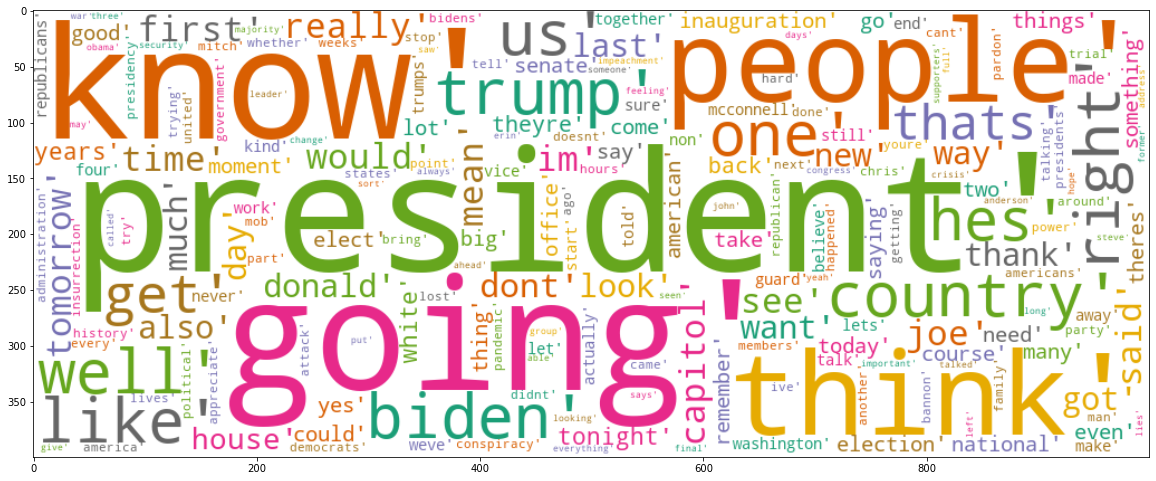

In [315]:
wc = WordCloud(background_color="white", colormap="Dark2", width = 1000, height = 400,
               max_font_size=150).generate(str(list(freq_19['Word'])))

fig, ax = plt.subplots(figsize=(20, 15))

ax.imshow(wc, interpolation='bilinear')

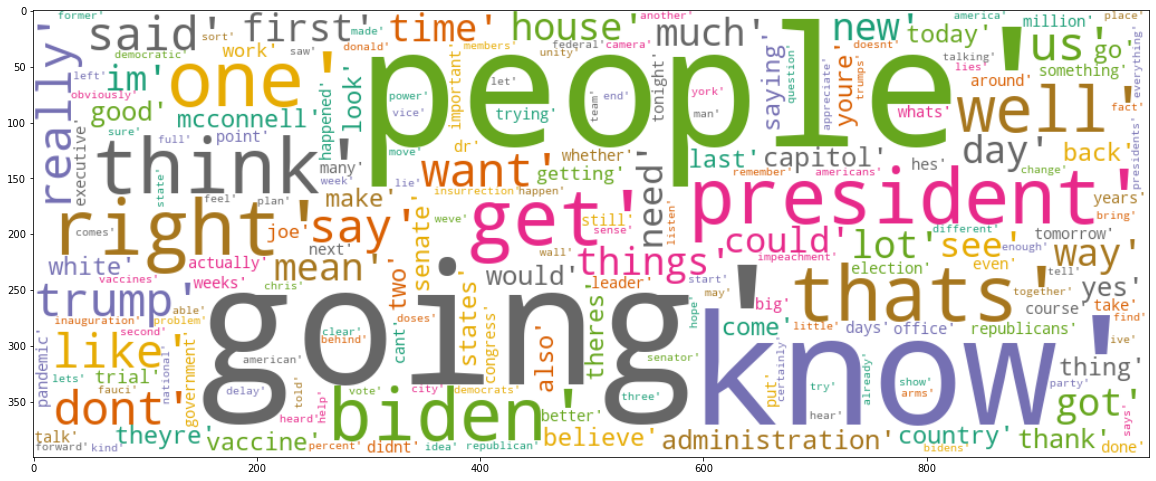

In [316]:
wc = WordCloud(background_color="white", colormap="Dark2", width = 1000, height = 400,
               max_font_size=150).generate(str(list(freq_21['Word'])))

fig, ax = plt.subplots(figsize=(20, 15))

ax.imshow(wc, interpolation='bilinear')

### Sentiment Analysis

In [351]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
names = ['Anderson 360', 'Erin Burnett OutFront', 'Cuomo Prime Time', 'CNN Tonight 1', 'CNN Tonight 2']

In [353]:
sentiment_19 = pd.DataFrame(list(zip(names, [pol(x) for x in text_19_cleaned], [sub(x) for x in text_19_cleaned])), \
             columns = ['News Segment', 'Polarity', 'Subjectivity'])
sentiment_19

,News Segment,Polarity,Subjectivity
0,Anderson 360,0.116898,0.489257
1,Erin Burnett OutFront,0.131038,0.496828
2,Cuomo Prime Time,0.091380,0.487006
3,CNN Tonight 1,0.135148,0.467738
4,CNN Tonight 2,0.117787,0.447586


In [347]:
print('Mean Polarity: ' + str(sentiment_19['Polarity'].mean()))
print('Mean Subjectivity: ' + str(sentiment_19['Subjectivity'].mean()))

Mean Polarity: 0.11845022371899586
Mean Subjectivity: 0.47768307969235996


In [354]:
sentiment_21 = pd.DataFrame(list(zip(names, [pol(x) for x in text_21_cleaned], [sub(x) for x in text_21_cleaned])), \
             columns = ['News Segment', 'Polarity', 'Subjectivity'])
sentiment_21

,News Segment,Polarity,Subjectivity
0,Anderson 360,0.123062,0.423185
1,Erin Burnett OutFront,0.126965,0.442755
2,Cuomo Prime Time,0.117111,0.507607
3,CNN Tonight 1,0.135148,0.467738
4,CNN Tonight 2,0.071482,0.440289


In [349]:
print('Mean Polarity: ' + str(sentiment_21['Polarity'].mean()))
print('Mean Subjectivity: ' + str(sentiment_21['Subjectivity'].mean()))

Mean Polarity: 0.11475347626788027
Mean Subjectivity: 0.4563149823104461


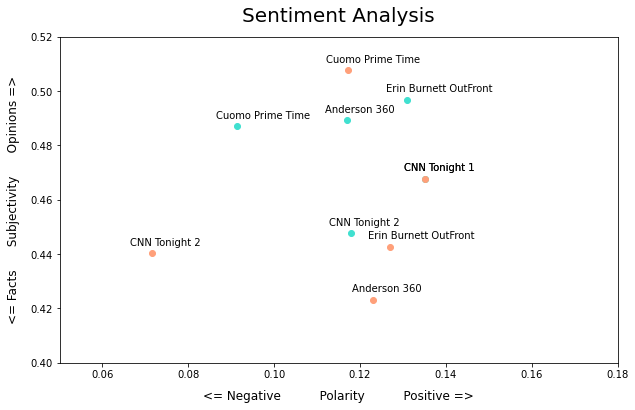

In [406]:
plt.figure(figsize=(10,6))

for i in range(len(sentiment_19)):
    x_19 = sentiment_19['Polarity'][i]
    y_19 = sentiment_19['Subjectivity'][i]
    plt.scatter(x_19, y_19, color='turquoise')
    plt.text(x_19-.005, y_19+.003, sentiment_19['News Segment'][i], fontsize=10)
    x_21 = sentiment_21['Polarity'][i]
    y_21 = sentiment_21['Subjectivity'][i]
    plt.scatter(x_21, y_21, color='lightsalmon')
    plt.text(x_21-.005, y_21+.003, sentiment_21['News Segment'][i], fontsize=10)
    plt.xlim(0.05, .18)
    plt.ylim(0.4, 0.52)
    
plt.title('Sentiment Analysis', fontsize=20, pad = 15)
plt.xlabel('<= Negative          Polarity          Positive =>', fontsize=12, labelpad=10)
plt.ylabel('<= Facts      Subjectivity      Opinions =>', fontsize=12, labelpad=10)

plt.show()